In [1]:
## We import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, r2_score, plot_confusion_matrix, precision_score, recall_score, roc_curve,auc
from sklearn.metrics import roc_auc_score, RocCurveDisplay, precision_recall_curve,f1_score


import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
## We load the dataset and preview 
diabetes = pd.read_csv(r'C:\Users\benja\OneDrive\Desktop\Datasets\Diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## Let's look at the distribution of our target variable: 
print(diabetes.Outcome.value_counts())
print("\n")
mean_diabetes = round((diabetes[diabetes.Outcome == 1]['Outcome']).count() / len(diabetes.Outcome),2)
print('Proportion wbmean_diabetes: ' + str(mean_diabetes))

0    500
1    268
Name: Outcome, dtype: int64


Proportion wbmean_diabetes: 0.35


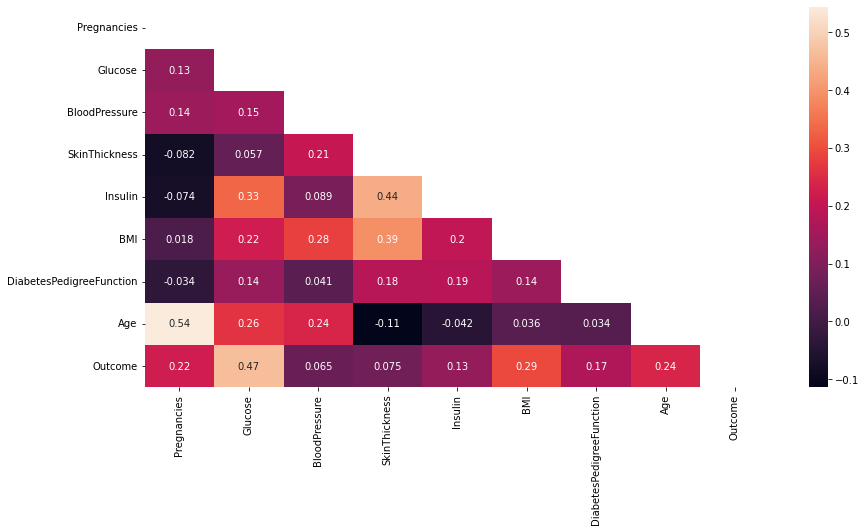

In [4]:
plt.figure(figsize=(14,7))
sns.heatmap(diabetes.corr(), annot = True, mask = np.triu(diabetes.corr()))
plt.show()

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X = diabetes.drop(columns = 'Outcome') 
y = diabetes.Outcome

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X)
X_scaled = X_scaled.transform(X)
X_scaled[0:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.25, random_state = 42)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(576, 8) (192, 8) (576,) (192,)


## Logistic Regression

In [9]:
## Using Logistic regression model:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Actuals: ' + str(np.array(y_test))) 
print("\n")
print('Predicted: '+ str(y_pred))
print("\n")
print('Logreg Score (using score method): ' +str(logreg.score(X_test,y_test)))
print("\n")
print('Logreg Accuracy Score (using accuracy_score): '+ str(accuracy_score(y_test,y_pred)))
print("\n")
print('First 5 predictions: ')
print(logreg.predict_proba(X_test)[0:5])
print("\n")
print('First 5 confidence scores for each: ')
print(logreg.decision_function(X_test)[0:5])

Actuals: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0]


Predicted: [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0]


Logreg Score (using score method): 0.7291666666666666


Logreg Accuracy Score (using accuracy_score): 0.7291666666666666


First 5 predictions: 
[[0.72592455 0.27407545]
 [0.80928    0.19072   ]

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



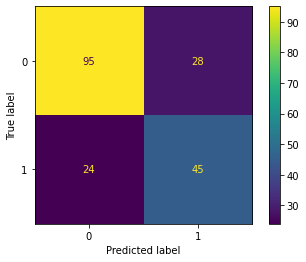

Accuracy: 0.73
Precision: 0.62
Recall: 0.65
F1_Score: 0.63
MCC: 0.42
ROC_SCORE: 0.794


In [11]:
plot_confusion_matrix(logreg,X_test,y_test)
plt.show()
print('Accuracy: ' + str(round(accuracy_score(y_test,y_pred),2)))
print('Precision: '+str(round(precision_score(y_test,y_pred),2)))
print('Recall: '+str(round(recall_score(y_test,y_pred),2)))
print('F1_Score: '+str(round(f1_score(y_test,y_pred),2)))
print('MCC: '+str(round(matthews_corrcoef(y_test,y_pred),2)))
print('ROC_SCORE: ' + str(round(roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1]),3)))
## Check below for documentation: 
#print('This is wrong: ' + str(round(roc_auc_score(y_test,y_pred),3)))
## Check documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

## Best Lreg

In [12]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
best_lreg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'l1_ratio': [0,.5,1],
             'penalty':['none','l1','l2','elasticnet']
             }

logreg_GS_roc_auc = GridSearchCV(best_lreg, param_grid = param_grid, cv = 5, verbose = True, n_jobs=-1, 
                                  scoring = 'roc_auc')
logreg_GS_roc_auc.fit(X_train,y_train)



lorgreg_GS_accuracy = GridSearchCV(best_lreg, param_grid = param_grid, cv = 5, verbose = True, n_jobs=-1, 
                                  scoring = 'accuracy')
lorgreg_GS_accuracy.fit(X_train,y_train)



## ROC_AUC: 
print('\n Best ROC_AUC: ')
print('Best Estimator:' +str(logreg_GS_roc_auc.best_estimator_))
print('Best Params:' +str(logreg_GS_roc_auc.best_params_))
print('Best Score:' +str(logreg_GS_roc_auc.best_score_))
print('cv_results' + str(logreg_GS_roc_auc.cv_results_))

print('\n Best Accuracy: ')
## Accuracy: 
print('Best Estimator:' +str(lorgreg_GS_accuracy.best_estimator_))
print('Best Params:' +str(lorgreg_GS_accuracy.best_params_))
print('Best Score:' +str(lorgreg_GS_accuracy.best_score_))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits

 Best ROC_AUC: 
Best Estimator:LogisticRegression(C=0.1, l1_ratio=0)
Best Params:{'C': 0.1, 'l1_ratio': 0, 'penalty': 'l2'}
Best Score:0.8377398110661268
cv_results{'mean_fit_time': array([0.01841078, 0.00101366, 0.02130885, 0.00185313, 0.01629033,
       0.00086465, 0.01523938, 0.00126286, 0.01516795, 0.00116186,
       0.01208954, 0.00174184, 0.01636949, 0.00096121, 0.01073098,
       0.00084238, 0.01054707, 0.00090647, 0.01496153, 0.00086198,
       0.01974363, 0.00099788, 0.01020908, 0.00083613, 0.01992369,
       0.00029435, 0.01132927, 0.00058041, 0.01277552, 0.00123496,
       0.00779753, 0.00109873, 0.0077518 , 0.00070953, 0.00848603,
       0.00099564, 0.00881248, 0.00059824, 0.01480594, 0.00079751,
       0.00839248, 0.00042486, 0.01134796, 0.0005579 , 0.00774007,
       0.00099726, 0.00699563, 0.00109692, 0.01022692, 0.00134749,
       0.01261134, 0.00

In [14]:
print(logreg_GS_roc_auc.cv_results_)

{'mean_fit_time': array([0.01841078, 0.00101366, 0.02130885, 0.00185313, 0.01629033,
       0.00086465, 0.01523938, 0.00126286, 0.01516795, 0.00116186,
       0.01208954, 0.00174184, 0.01636949, 0.00096121, 0.01073098,
       0.00084238, 0.01054707, 0.00090647, 0.01496153, 0.00086198,
       0.01974363, 0.00099788, 0.01020908, 0.00083613, 0.01992369,
       0.00029435, 0.01132927, 0.00058041, 0.01277552, 0.00123496,
       0.00779753, 0.00109873, 0.0077518 , 0.00070953, 0.00848603,
       0.00099564, 0.00881248, 0.00059824, 0.01480594, 0.00079751,
       0.00839248, 0.00042486, 0.01134796, 0.0005579 , 0.00774007,
       0.00099726, 0.00699563, 0.00109692, 0.01022692, 0.00134749,
       0.01261134, 0.00077262, 0.01341825, 0.00098376, 0.01421409,
       0.00080757, 0.01411438, 0.00046868, 0.01557107, 0.00097723,
       0.01293349, 0.00079875, 0.01372828, 0.00049143, 0.01301203,
       0.00083823, 0.01280255, 0.00051584, 0.014996  , 0.00079689,
       0.01699862, 0.00054564, 0.01223898, 0

In [15]:
best_lreg_roc_auc = LogisticRegression(C= 0.01, l1_ratio= 0, penalty= 'l2')
best_lreg_accuracy = LogisticRegression(C= 100, l1_ratio= 0, penalty= 'l2')

In [16]:
best_lreg_roc_auc.fit(X_train,y_train)
best_lreg_accuracy.fit(X_train,y_train)

## Accuracy Score for both: 
print('ROC Scoring Accuracy Score: ' +str(round(best_lreg_roc_auc.score(X_test,y_test),4)))
print('Accuracy Scoring Accuracy Score: ' +str(round(best_lreg_accuracy.score(X_test,y_test),4)))

ROC Scoring Accuracy Score: 0.7656
Accuracy Scoring Accuracy Score: 0.7292


## Evaluations: 

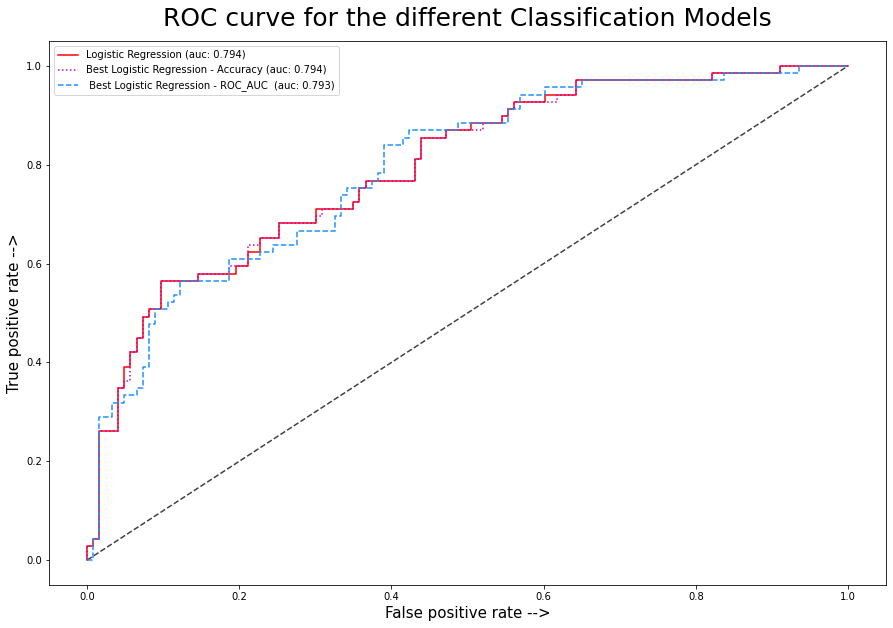

In [17]:
## We plot the ROC and AUC 
names = ["Logistic Regression",'Best Logistic Regression - Accuracy', ' Best Logistic Regression - ROC_AUC ']
clfs = [logreg, best_lreg_accuracy, best_lreg_roc_auc]

## Parameters for the plotting 
linestyles =['-',':','--',':','-','--',':','-','-']
colors = ['r','m','dodgerblue','g','darkorange','limegreen', 'deeppink','navy','y']

plt.figure(figsize=(15,10))
counter = 0
for name,clf in zip(names,clfs):
    clf.fit(X_train,y_train)
    y_proba = clf.predict_proba(X_test)[:,1]
    #print("Roc AUC:"+name, roc_auc_score(y_test, clf.predict_proba(X_test)[:,1],average='macro')) ## Can uncomment
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name+ ' (auc: %0.3f)' %roc_auc_score(y_test, clf.predict_proba(X_test)[:,1],average='macro'),
             linestyle=linestyles[counter], c=colors[counter])
    counter += 1
## Plot a straight line that goes throug
lims = [np.min([0.0, 0.0]),  np.max([1.0, 1.0])]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0, c='black', linestyle ='--')

plt.xlabel('False positive rate -->', fontsize = 15)
plt.ylabel('True positive rate -->', fontsize = 15)
plt.title('ROC curve for the different Classification Models', pad =15, fontsize = 25)
plt.legend(loc='best')
plt.savefig('roc_auc_classification_resampled.png')
plt.show() 

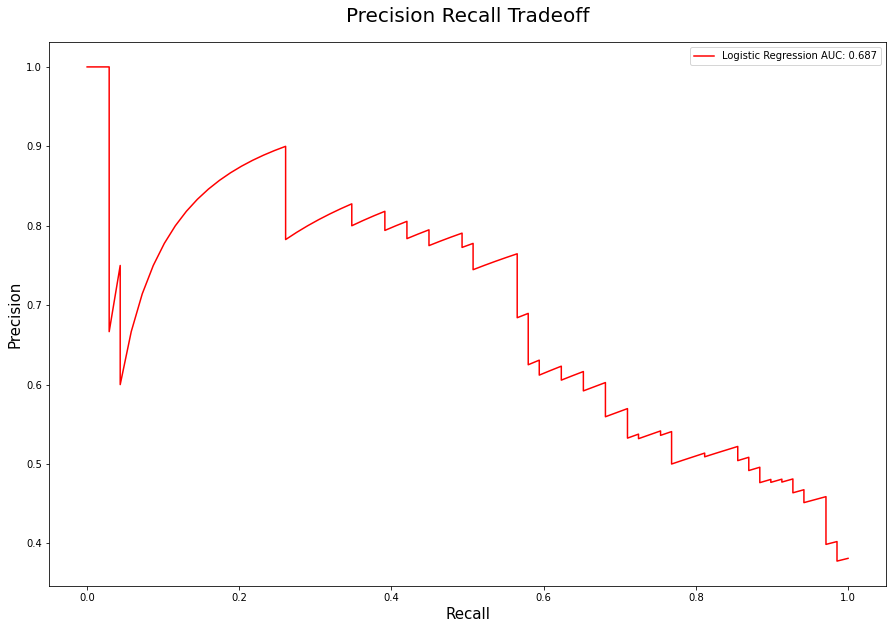

In [18]:
## Plotting the Precision / Recall Tradeoff 

names = ["Logistic Regression","Best Logistic Regression"]
models = [logreg]
colors = ['r']
linestyles =['-']

plt.figure(figsize=(15,10))
counter = 0
for name, model in zip(names,models):
    y_decision_function = model.decision_function(X_test)
    precision,recall,threshold = precision_recall_curve(y_test,y_decision_function)
    plt.plot(recall,precision,color=colors[counter], 
             linestyle=linestyles[counter], 
             label = name +' AUC: %.3f'%auc(recall,precision))
    counter +=1
    
plt.title('Precision Recall Tradeoff', pad=20, fontsize = 20)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)
plt.legend()
plt.show()

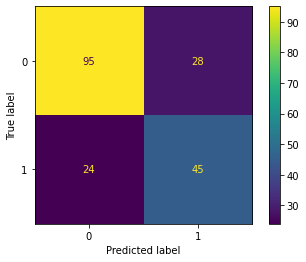

In [19]:
plot_confusion_matrix(logreg,X_test,y_test)
plt.show()

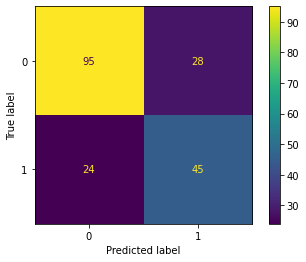

In [20]:
plot_confusion_matrix(best_lreg_accuracy, X_test,y_test)
plt.show()

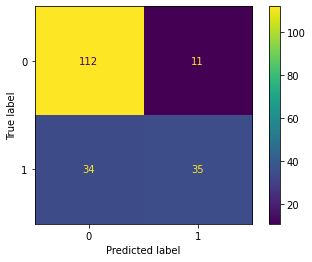

In [21]:
plot_confusion_matrix(best_lreg_roc_auc,X_test,y_test)
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix, fbeta_score

#Using the Random Forest Model the confusion matrix is generated

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

confusion_lreg = confusion_matrix(y_test, logreg.predict(X_test))
print(confusion_lreg)

confusion_best_lreg_roc_auc = confusion_matrix(y_test, (best_lreg_roc_auc.predict(X_test)))
print(confusion_best_lreg_roc_auc)

confusion_best_lreg_accuracy = confusion_matrix(y_test, best_lreg_accuracy.predict(X_test))
print(confusion_best_lreg_accuracy)

[[95 28]
 [24 45]]
[[112  11]
 [ 34  35]]
[[95 28]
 [24 45]]


In [23]:
from sklearn.metrics import classification_report

def precision_recall(model, X_test, y_test, threshold, beta = 0.5):
    
    y_pred = (model.predict_proba(X_test)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_test, y_pred)
    
    print(threshold,'\n', matrix)
    
    tn = matrix[0,0]# pets that were predicted to get adopted and did
    tp = matrix[1,1]# pets that were predicted not to get adopted and didn't
    fp = matrix[0,1]# pets that were predicted not to get adopted but did
    fn = matrix[1,0]# pets that were predicted to get adopted but didn't
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f_beta = fbeta_score(y_test, y_pred, beta=beta)
    
    return([precision, recall, f_beta])

In [24]:
y_pred = (best_lreg_roc_auc.predict_proba(X_test)[:,1] >= 0.38).astype(bool)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       123
           1       0.55      0.67      0.61        69

    accuracy                           0.69       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.70      0.69      0.69       192



In [25]:
threshold_df = pd.DataFrame(columns=['Precision','Recall','F0.5_measure'])

for threshold in np.arange(0.1,.9,.02):
    
    threshold_df.loc[threshold] = precision_recall(best_lreg_roc_auc, X_test, y_test, threshold)
    
      
print(threshold_df)

0.1 
 [[  8 115]
 [  0  69]]
0.12000000000000001 
 [[  8 115]
 [  1  68]]
0.14 
 [[ 14 109]
 [  1  68]]
0.16000000000000003 
 [[ 19 104]
 [  1  68]]
0.18000000000000002 
 [[25 98]
 [ 2 67]]
0.2 
 [[39 84]
 [ 2 67]]
0.22000000000000003 
 [[49 74]
 [ 3 66]]
0.24000000000000002 
 [[53 70]
 [ 4 65]]
0.26 
 [[55 68]
 [ 8 61]]
0.28 
 [[64 59]
 [ 9 60]]
0.30000000000000004 
 [[70 53]
 [ 9 60]]
0.32000000000000006 
 [[75 48]
 [15 54]]
0.3400000000000001 
 [[78 45]
 [17 52]]
0.3600000000000001 
 [[83 40]
 [22 47]]
0.38 
 [[86 37]
 [23 46]]
0.4 
 [[91 32]
 [25 44]]
0.42000000000000004 
 [[93 30]
 [25 44]]
0.44000000000000006 
 [[95 28]
 [27 42]]
0.4600000000000001 
 [[101  22]
 [ 30  39]]
0.4800000000000001 
 [[109  14]
 [ 33  36]]
0.5000000000000001 
 [[112  11]
 [ 34  35]]
0.5200000000000001 
 [[113  10]
 [ 37  32]]
0.54 
 [[113  10]
 [ 40  29]]
0.56 
 [[114   9]
 [ 45  24]]
0.5800000000000001 
 [[117   6]
 [ 47  22]]
0.6000000000000001 
 [[121   2]
 [ 51  18]]
0.6200000000000001 
 [[121   2]


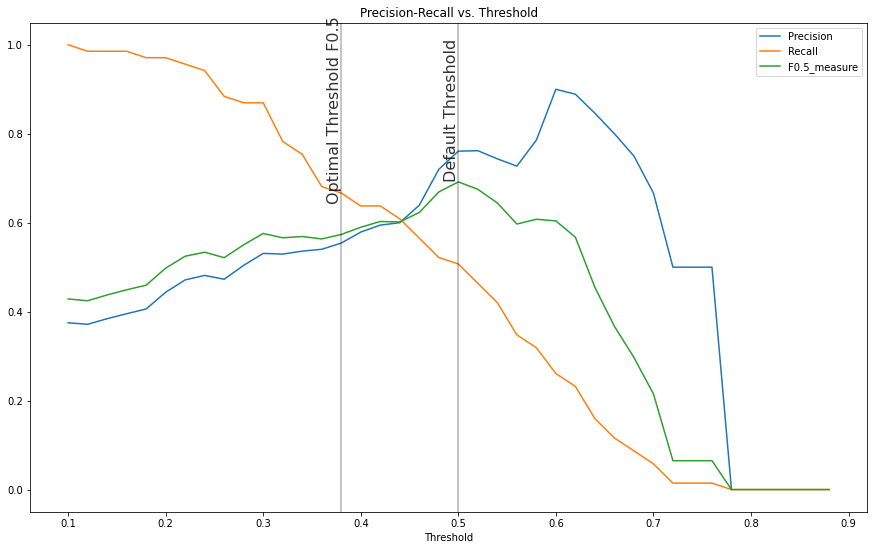

In [26]:
ax = threshold_df.plot(figsize=(15,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.38, color='black', alpha=0.3)
ax.text(.365,.65,'Optimal Threshold F0.5',rotation=90, alpha=0.8, fontsize=16)
ax.axvline(0.5, color ='black', alpha = 0.3)
ax.text(.485,.7,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);